In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Input data files check
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

In [2]:
G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

In [3]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

In [4]:
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

In [5]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

In [34]:
plt.figure(figsize=(50,50))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

# Get node attributes directly from the graph
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

<Figure size 5000x5000 with 0 Axes>

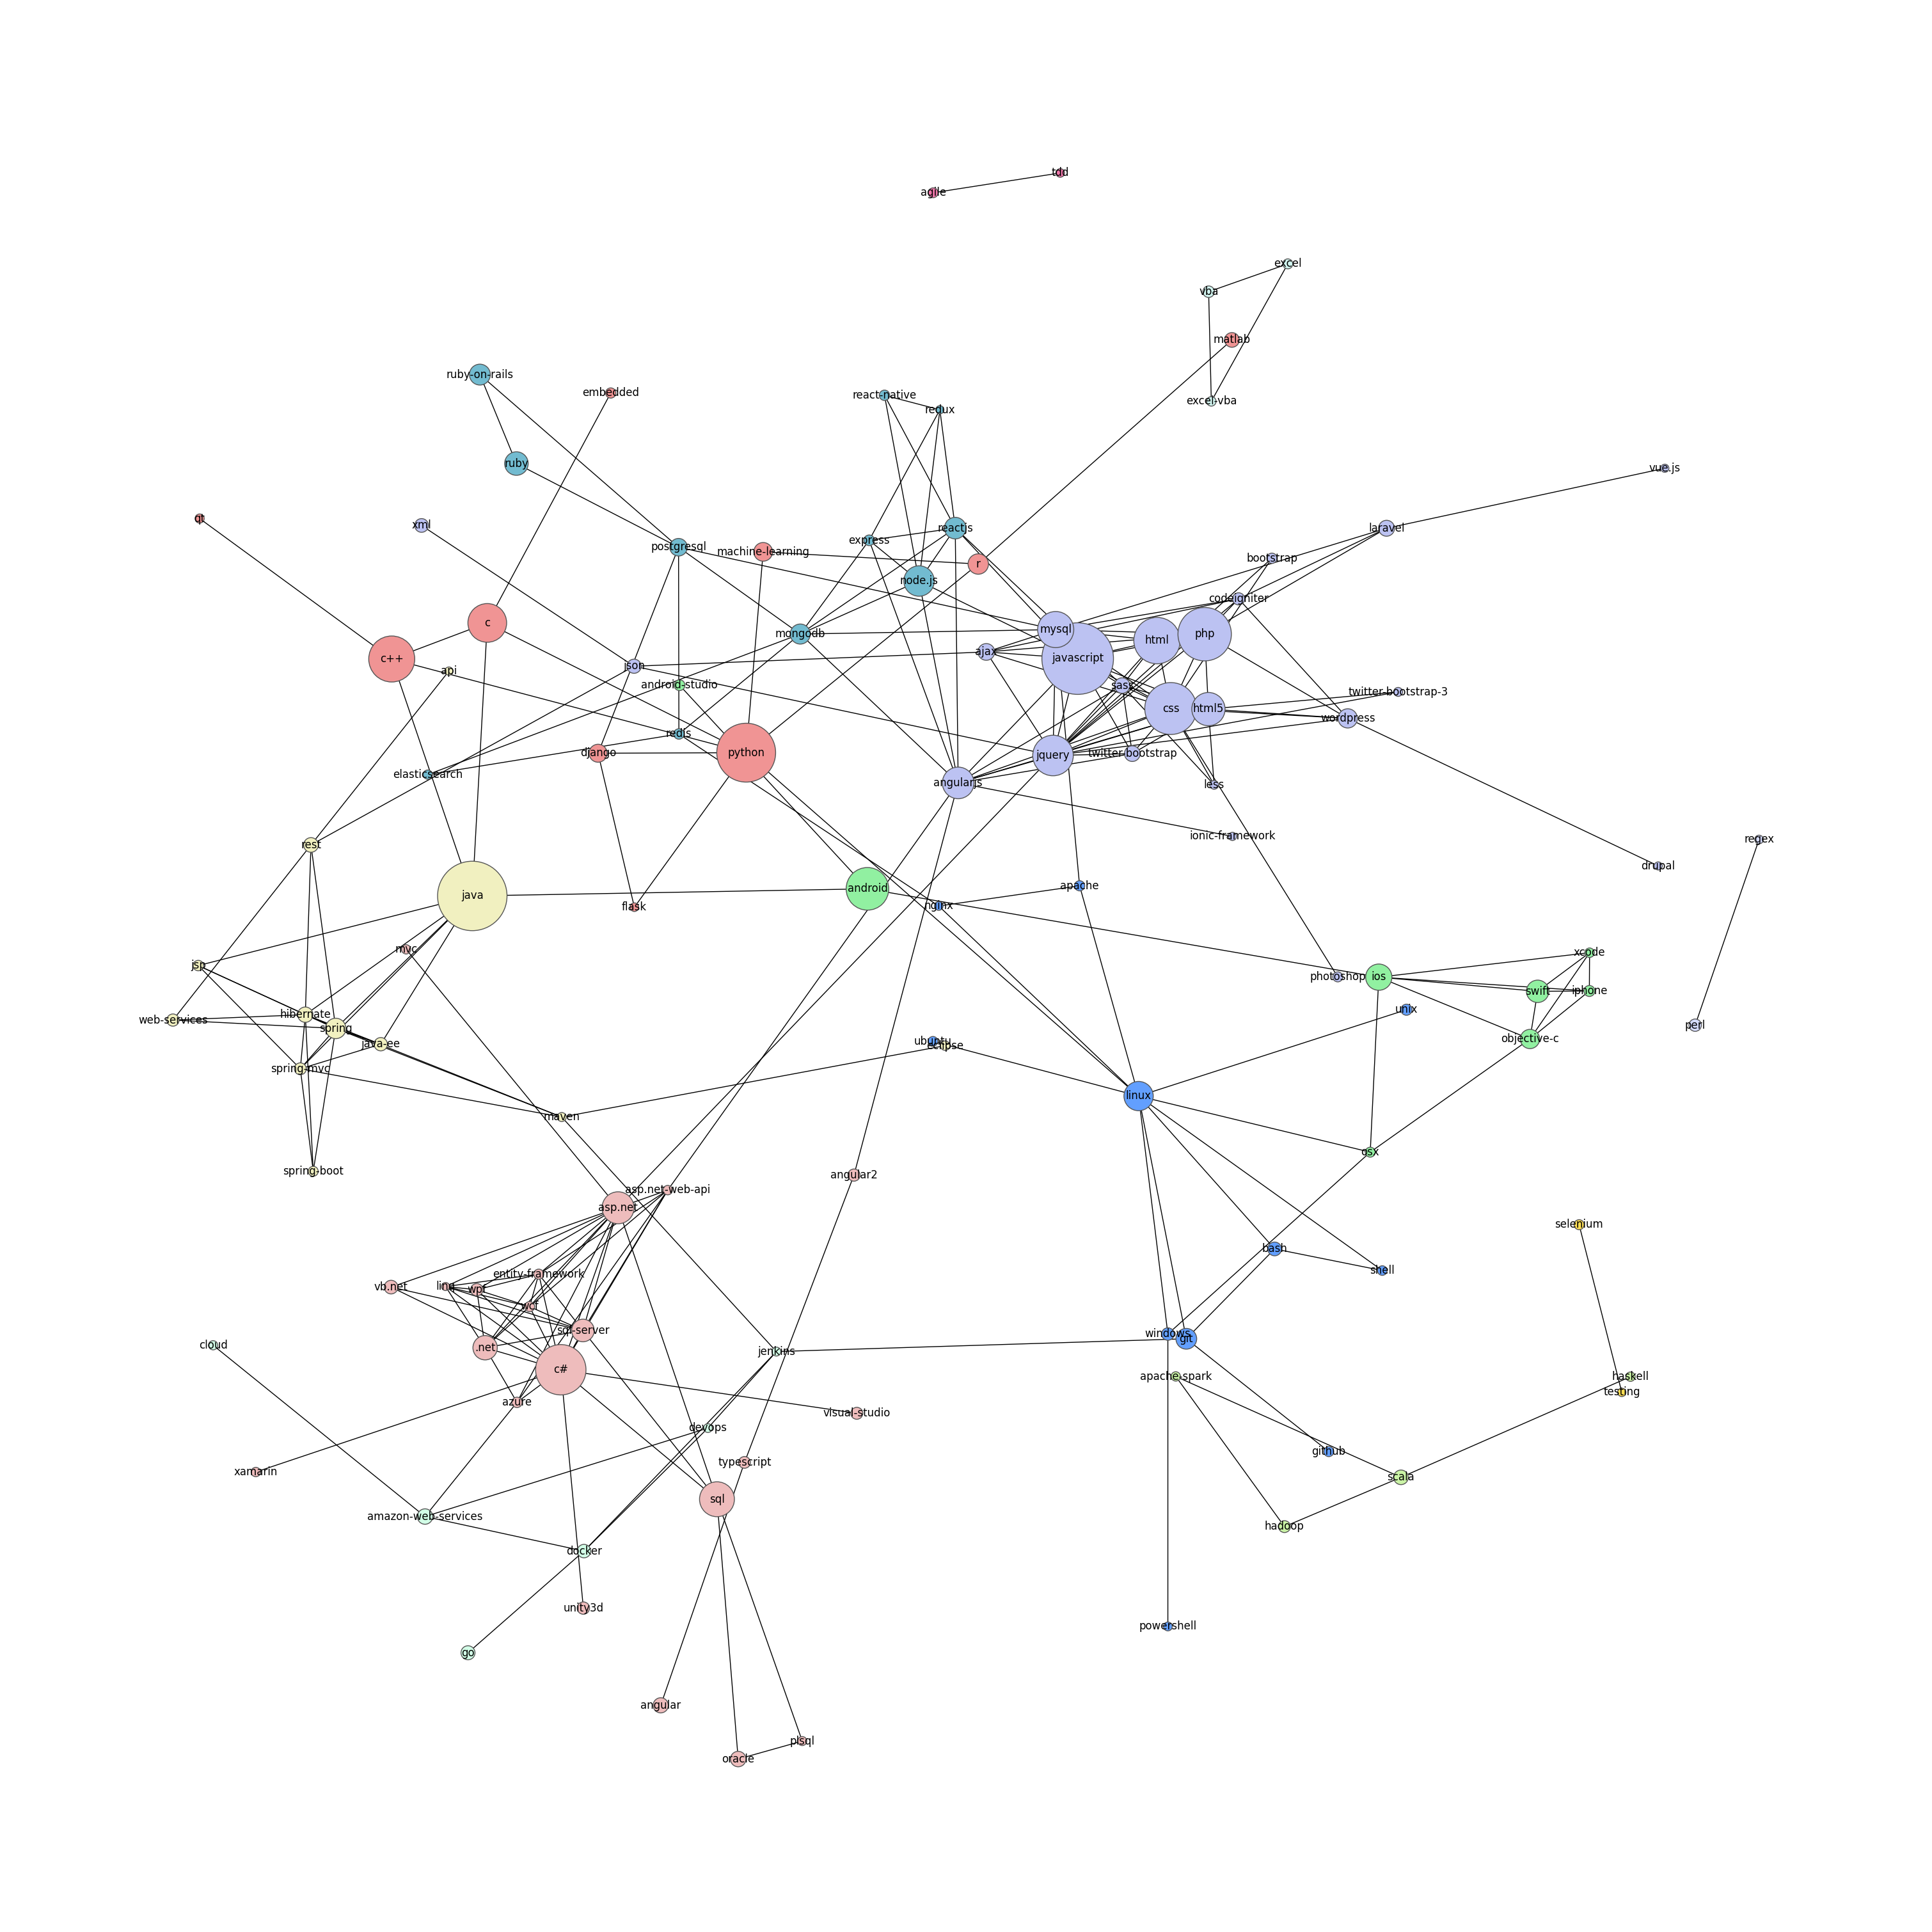

In [43]:
# Generate the layout using a force-directed algorithm
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
plt.figure(figsize=(30,30))
nx.draw(G, node_color=colors, node_size=sizes, pos=pos, **options)

# Set edge color
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 

# Save the output to a file
plt.savefig("output_graph2.png")

# Display the graph
plt.show()